In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

random.seed(0)
np.random.seed(0)

In [2]:
data = pd.read_csv('data.txt',header=None,names=['x','y'],delim_whitespace=True)

In [3]:
data.head()

,x,y
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565


<AxesSubplot:xlabel='x', ylabel='y'>

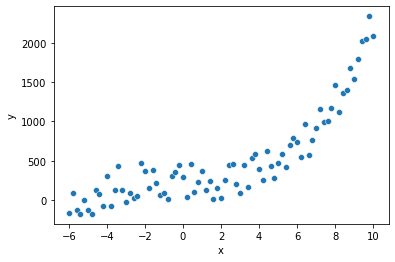

In [4]:
sns.scatterplot(x='x',y='y',data=data)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [6]:
X=data['x'].to_numpy()
Y=data['y'].to_numpy()
kfold = KFold(n_splits=10)
trainX=[]
trainY=[]
testX=[]
testY=[]

In [7]:
for train_index, test_index in kfold.split(X):
    trainX.append(X[train_index])
    testX.append(X[test_index])
    trainY.append(Y[train_index])
    testY.append(Y[test_index]) 

In [8]:
stdTrainX=[]
stdTestX=[]
stdTrainY=[]
stdTestY=[]
for i in range(10):
    stdTrainX.append((trainX[i]-np.mean(trainX[i]))/np.std(trainX[i]))
    stdTrainY.append((trainY[i]-np.mean(trainY[i]))/np.std(trainY[i]))
    stdTestX.append((testX[i]-np.mean(testX[i]))/np.std(testX[i]))
    stdTestY.append((testY[i]-np.mean(testY[i]))/np.std(testY[i]))

In [107]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [108]:
# to create the poly matrix 
def matForm(X,degree):
    for i in range(degree):
        exp = i+1
        arr = np.power(X,exp)
        if i==0:
            modArr = arr
        else:
            modArr = np.column_stack((NX,arr))
        NX = modArr
    return NX

In [112]:
models=[]

In [113]:
def computeModels(degree):
    currentModel=[]
    for ind in range(10):
        Xtrain = matForm(stdTrainX[ind].reshape(-1,1),degree)
        Xtest = matForm(stdTestX[ind].reshape(-1,1),degree)
        cmodel = SGDRegressor()
        cmodel.fit(Xtrain,stdTrainY[ind])
        pred = cmodel.predict(Xtest)
        print("weights : ",cmodel.coef_)
        print("w0 : ",cmodel.intercept_)
        currentModel.append(cmodel)
    models.append(currentModel)   

In [114]:
#3a.
computeModels(degree=1)
len(models)

weights :  [0.77929417]
w0 :  [-0.00048534]
weights :  [0.79288876]
w0 :  [0.00067833]
weights :  [0.79319685]
w0 :  [0.00220956]
weights :  [0.78984858]
w0 :  [0.00048642]
weights :  [0.80526777]
w0 :  [-0.00010014]
weights :  [0.81249361]
w0 :  [0.00057077]
weights :  [0.8160706]
w0 :  [6.29125974e-05]
weights :  [0.80970857]
w0 :  [0.00059276]
weights :  [0.76799056]
w0 :  [0.00100453]
weights :  [0.78378886]
w0 :  [-0.00058399]


1

In [115]:
#3b
computeModels(degree=3)
len(models)

weights :  [0.24400662 0.38569314 0.31340101]
w0 :  [-0.3242532]
weights :  [0.28940957 0.44481613 0.30807657]
w0 :  [-0.32474167]
weights :  [0.24736193 0.42617433 0.35684931]
w0 :  [-0.29200822]
weights :  [0.22353059 0.38998987 0.38401622]
w0 :  [-0.27395387]
weights :  [0.21720027 0.32056308 0.39514132]
w0 :  [-0.24338723]
weights :  [0.21156979 0.30530549 0.37822082]
w0 :  [-0.2667702]
weights :  [0.18401266 0.27071668 0.36492993]
w0 :  [-0.26720321]
weights :  [0.15270091 0.23972447 0.34626054]
w0 :  [-0.25417109]
weights :  [0.09898265 0.2110716  0.33929809]
w0 :  [-0.22226448]
weights :  [0.1882513  0.22127055 0.35484798]
w0 :  [-0.16264653]


2

In [116]:
#3c
computeModels(degree=5)
len(models)

weights :  [0.29060914 0.04755345 0.21293448 0.15906841 0.0384818 ]
w0 :  [-0.30225287]
weights :  [0.27500766 0.02937741 0.23588956 0.17967461 0.05721469]
w0 :  [-0.27397522]
weights :  [0.25494135 0.0427864  0.2120066  0.18411873 0.07910568]
w0 :  [-0.27116991]
weights :  [0.24919675 0.04718956 0.22107211 0.18754447 0.0622029 ]
w0 :  [-0.27274811]
weights :  [0.25254484 0.01162381 0.21976164 0.17919987 0.08065558]
w0 :  [-0.25911303]
weights :  [0.24743738 0.02642392 0.19379468 0.1539702  0.07489915]
w0 :  [-0.2720915]
weights :  [0.22764711 0.03230711 0.18581469 0.12629293 0.05418217]
w0 :  [-0.28491514]
weights :  [0.19807943 0.02076386 0.17970403 0.10090585 0.04733157]
w0 :  [-0.27721379]
weights :  [0.19677554 0.01055066 0.16663972 0.09872739 0.03954368]
w0 :  [-0.23703963]
weights :  [0.23402242 0.03398936 0.21495085 0.09476812 0.04507915]
w0 :  [-0.19666022]


3

In [117]:
#3d
computeModels(degree=50)
len(models)

weights :  [-8.83491239e+10 -4.63147338e+10 -1.18164579e+11 -1.31069471e+11
 -1.82965972e+11 -3.27705559e+11 -3.13581529e+11 -7.94416016e+11
 -5.65016444e+11 -1.92009366e+12 -1.03734961e+12 -4.65553477e+12
 -1.90362790e+12 -1.13214634e+13 -3.43430488e+12 -2.75658455e+13
 -5.95359809e+12 -6.70795805e+13 -9.46985220e+12 -1.62890410e+14
 -1.20620022e+13 -3.94230381e+14 -3.92449042e+12 -9.49965770e+14
  5.30809830e+13 -2.27703829e+15  2.93040958e+14 -5.42432881e+15
  1.16466181e+15 -1.28296861e+16  4.12835732e+15 -3.00954175e+16
  1.38559503e+16 -6.99234176e+16  4.51182663e+16 -1.60645285e+17
  1.44215518e+17 -3.64189228e+17  4.55299388e+17 -8.12486160e+17
  1.42465728e+18 -1.77726874e+18  4.42728633e+18 -3.79280549e+18
  1.36813317e+19 -7.84008887e+18  4.20769860e+19 -1.55288296e+19
  1.28866787e+20 -2.89617260e+19]
w0 :  [-2.26595218e+10]
weights :  [-6.23937802e+10 -3.43945454e+11  5.28168036e+10 -8.34060323e+11
  4.23537608e+11 -2.20549530e+12  1.66311268e+12 -6.13366874e+12
  5.756854

4

In [118]:
len(models)

4

In [119]:
def computeErrors(degree,nthModel):
    modelNo = nthModel+1
    label = 'hypothesis'+str(modelNo)
    title = 'Hypothesis'+str(modelNo)
    plt.figure(figsize=(12,8))
    train_mean_err_list=[]
    test_mean_err_list=[]
    train_std_err_list=[]
    test_std_err_list=[]
    for i in range(10):
        Xtrain = matForm(stdTrainX[i].reshape(-1,1),degree)
        Xtest = matForm(stdTestX[i].reshape(-1,1),degree)
        predTrain = models[nthModel][i].predict(Xtrain)
        predTest = models[nthModel][i].predict(Xtest)
        train_err = np.square(predTrain-stdTrainY[i])
        test_err = np.square(predTest-stdTestY[i])
        train_mean_err_list.append(np.mean(train_err))
        test_mean_err_list.append(np.mean(test_err))
        train_std_err_list.append(np.std(train_err))
        test_std_err_list.append(np.std(test_err))
        print("mean train error : ",np.mean(train_err))
        print("std train error : ",np.std(train_err)/np.sqrt(10))
        print("mean test error : ",np.mean(test_err))
        print("std test error : ",np.std(test_err)/np.sqrt(10))
        print("\n")
      
    print("\n\n")
    ind=[1,2,3,4,5,6,7,8,9,10]
    plt.subplot(1,2,1)
    plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
    plt.xlabel(label)
    plt.ylabel('train mean error')
    plt.subplot(1,2,2)
    plt.plot(ind,test_mean_err_list,'g')
    plt.errorbar(x=ind,y=test_mean_err_list,yerr=test_std_err_list)
    plt.xlabel(label)
    plt.ylabel('test mean error')
    plt.suptitle(title)
    plt.show()

    min_val = min(train_mean_err_list)
    min_ind = train_mean_err_list.index(min_val)
    print("min training error ",min_val," at index",min_ind+1,"for Hypothesis ",modelNo)
    plt.scatter(stdTrainX[min_ind],stdTrainY[min_ind])
    X_Poly = matForm(stdTrainX[min_ind].reshape(-1,1),degree)
    pred = models[nthModel][min_ind].predict(X_Poly)
    plt.scatter(stdTrainX[min_ind],pred)
    
    

mean train error :  0.31953490643174587
std train error :  0.15896551215565083
mean test error :  1.0297693276550925
std test error :  0.46606038978755343


mean train error :  0.2998090793865395
std train error :  0.15612258433325052
mean test error :  1.4858644077492489
std test error :  0.4569359645093605


mean train error :  0.3007122267132641
std train error :  0.15764000305685802
mean test error :  1.4370787508880505
std test error :  0.5588205860958847


mean train error :  0.30470445029435256
std train error :  0.15953797475334852
mean test error :  0.9080998053071863
std test error :  0.4385145978122448


mean train error :  0.28340397572689924
std train error :  0.1546701432956171
mean test error :  2.3821265224612325
std test error :  0.6906811869215094


mean train error :  0.2741340432675118
std train error :  0.14441609784868142
mean test error :  1.5262768115146819
std test error :  0.4284604905532224


mean train error :  0.26467955536391924
std train error :  0.137103

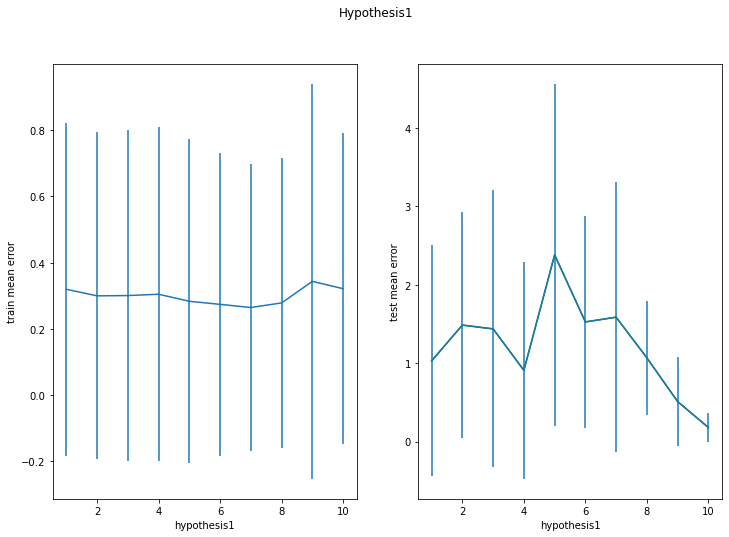

min training error  0.26467955536391924  at index 7 for Hypothesis  1


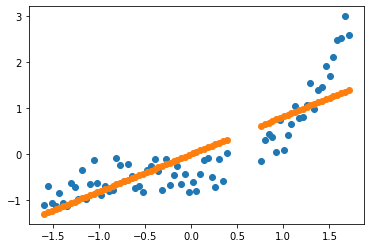

In [120]:
computeErrors(degree=1,nthModel=0)

mean train error :  0.08704177837035401
std train error :  0.032258394457341404
mean test error :  0.8413897172128375
std test error :  0.31348532807320234


mean train error :  0.07299740915741644
std train error :  0.024740184117470955
mean test error :  2.054468852273824
std test error :  0.651044805385017


mean train error :  0.07591764166094385
std train error :  0.02642785168904138
mean test error :  2.2721709476252148
std test error :  1.0721251884829945


mean train error :  0.07809273634773527
std train error :  0.02668839650177231
mean test error :  1.2546008534328978
std test error :  0.45928316224722887


mean train error :  0.08220727961763652
std train error :  0.030101572884984235
mean test error :  2.845073072044359
std test error :  1.141343803977588


mean train error :  0.07913512917615424
std train error :  0.027472396734458008
mean test error :  1.306463446264916
std test error :  0.3160288628728916


mean train error :  0.07659456119298769
std train error :  0.02

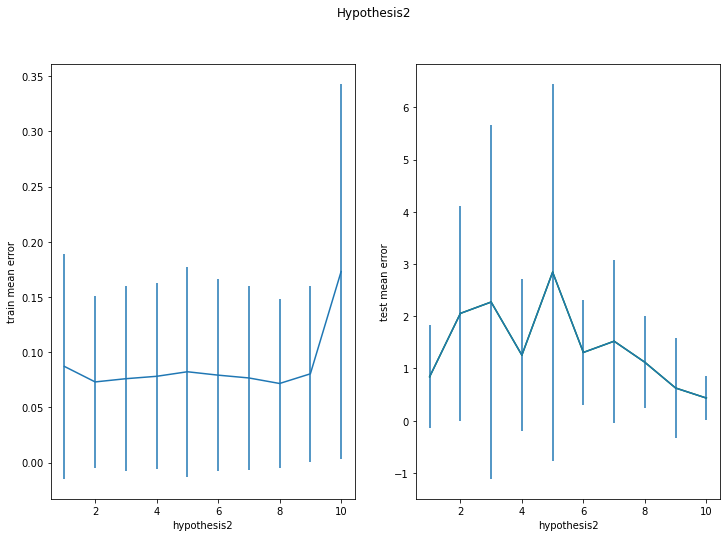

min training error  0.07158747060751537  at index 8 for Hypothesis  2


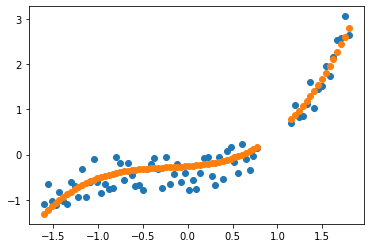

In [121]:
computeErrors(degree=3,nthModel=1)

mean train error :  0.08502447998277218
std train error :  0.03288829296436194
mean test error :  0.9113469840713118
std test error :  0.35259139198033085


mean train error :  0.07697473182823919
std train error :  0.02958403201560239
mean test error :  2.1638592025080268
std test error :  0.7492327932847704


mean train error :  0.07622218405388326
std train error :  0.02919168470006558
mean test error :  2.5217668230582486
std test error :  1.2740801901727563


mean train error :  0.07578494715904305
std train error :  0.025487863300482215
mean test error :  1.2171316294024273
std test error :  0.37257837892371237


mean train error :  0.06796514048963394
std train error :  0.02589168235813918
mean test error :  3.122510936232615
std test error :  1.3995276290779735


mean train error :  0.06982648533669902
std train error :  0.025294917347441614
mean test error :  1.2858200898808683
std test error :  0.26169162445418287


mean train error :  0.07015832940654587
std train error :  0

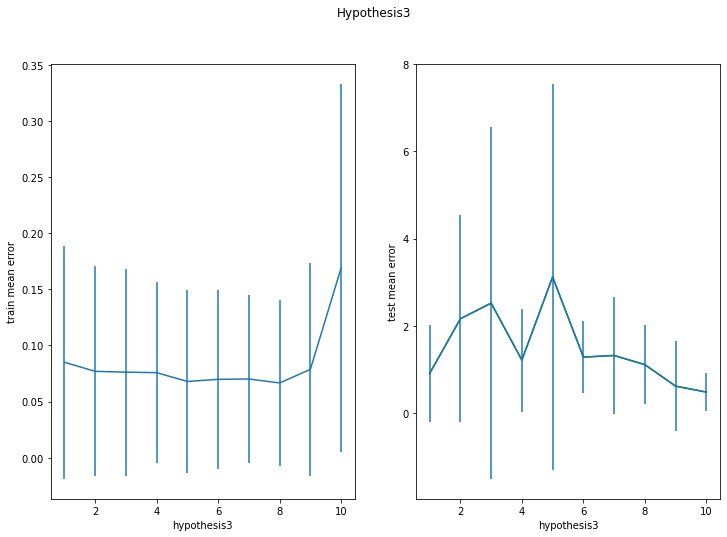

min training error  0.06661866691825581  at index 8 for Hypothesis  3


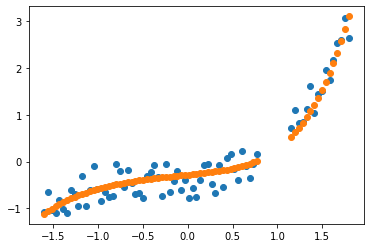

In [122]:
computeErrors(degree=5,nthModel=2)

mean train error :  4.4834647254611863e+61
std train error :  9.711726569948969e+61
mean test error :  2.4242922854016073e+58
std test error :  1.8026788432777379e+58


mean train error :  1.534287742380029e+71
std train error :  3.727642734020358e+71
mean test error :  7.531828940677786e+62
std test error :  5.641337558135392e+62


mean train error :  4.238191385737629e+65
std train error :  1.0347293058705033e+66
mean test error :  1.0126880633406893e+60
std test error :  7.749139231838645e+59


mean train error :  7.066531941282852e+59
std train error :  1.7357289411886793e+60
mean test error :  2.369674644222984e+56
std test error :  1.336164609565268e+56


mean train error :  1.8113639220100975e+58
std train error :  4.3442226986574765e+58
mean test error :  1.4690652670375882e+56
std test error :  1.0436305817606883e+56


mean train error :  9.644261689401751e+59
std train error :  2.3703142933244755e+60
mean test error :  4.6287465622662084e+57
std test error :  3.76487537151510

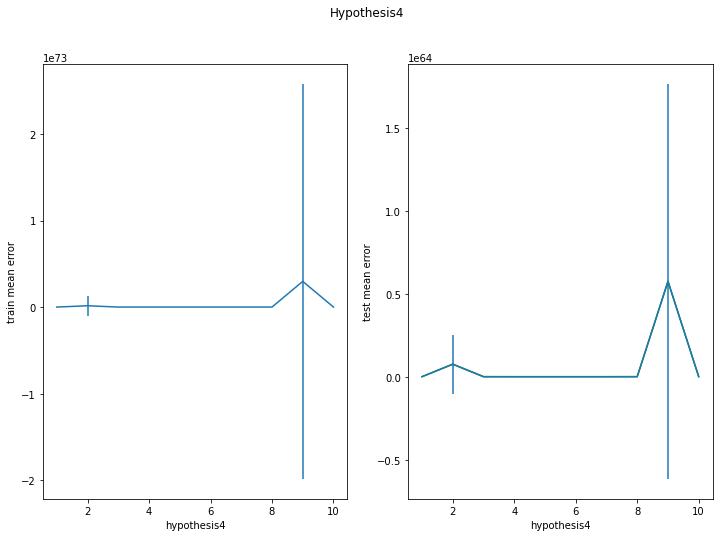

min training error  1.8113639220100975e+58  at index 5 for Hypothesis  4


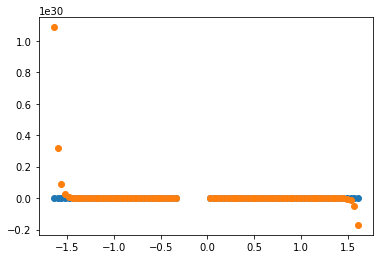

In [123]:
computeErrors(degree=50,nthModel=3)

weights :  [-1.14363306e+10  3.53307893e+10 -2.11268507e+10  3.52764941e+10
 -2.79525555e+10  2.30528267e+10 -4.26957613e+10  5.86187021e+09
 -1.16261892e+11  3.71229802e+10]
w0 :  [1.02148907e+10]
weights :  [ 6.27425838e+09  6.87402750e+09  3.50451555e+10 -3.97268804e+10
  7.93244215e+10 -1.11104310e+11  1.20264637e+11 -1.63257308e+11
  3.35916459e+10  4.20580661e+10]
w0 :  [2.42962337e+10]
weights :  [-3.95597093e+09  1.87961761e+10  1.13167080e+10  9.63344629e+09
  2.42157955e+10 -4.89784874e+09 -2.61574273e+08  1.01650957e+10
 -2.10874935e+11  2.12537652e+11]
w0 :  [1.361518e+10]
weights :  [-2.66463074e+10  1.20745238e+10 -3.13957453e+10  6.94579611e+09
 -3.94073577e+10 -1.59572941e+10 -5.92524116e+10 -8.11378942e+10
 -1.27641004e+11 -2.41055764e+11]
w0 :  [8.57654503e+09]
weights :  [ 7.16239834e+09 -2.08823391e+10  7.04973343e+09 -1.48306490e+10
 -5.74248425e+09 -2.45921749e+09 -4.96328795e+10  2.00349245e+10
 -1.74914840e+11  5.43242778e+10]
w0 :  [-2.38078466e+10]
weights :  

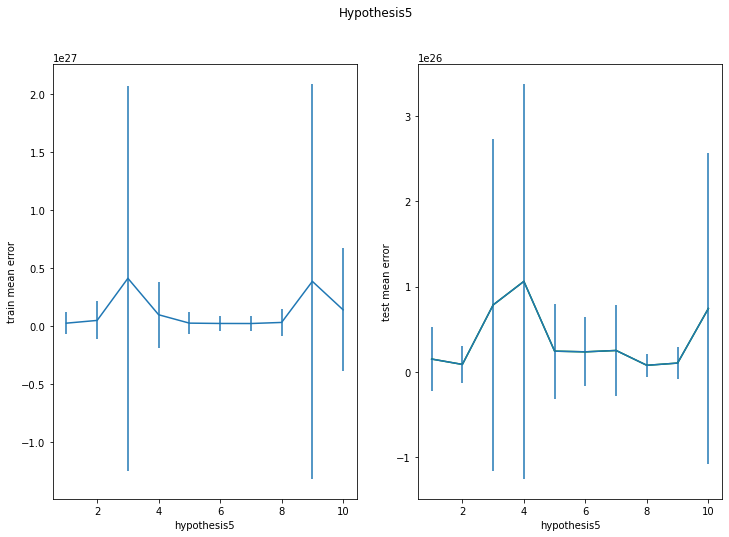

min training error  2.1984166463777387e+25  at index 7 for Hypothesis  5


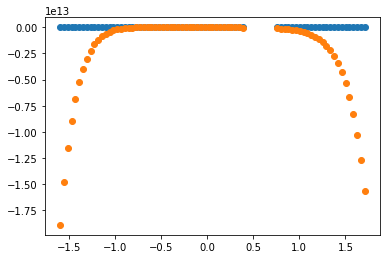

In [124]:
computeModels(degree=10)
computeErrors(degree=10,nthModel=4)

weights :  [ 12727.49714568   4121.1347632   19533.81603424   8300.80690419
  18467.13494676   8330.99861254 -17381.97230058]
w0 :  [808.2550538]
weights :  [-1.05336043e+10 -5.23601548e+09 -1.47193023e+10 -1.03961580e+10
 -1.53489665e+10 -7.88203134e+09  4.89338125e+09]
w0 :  [-1.16109177e+09]
weights :  [  7703942.35040326  -9282371.70906866  13378626.86767822
 -11774287.54913958  18321227.15481983  -2937749.76289743
   7025053.28642507]
w0 :  [-5684735.41857345]
weights :  [ 0.2117575   0.08798307  0.22971156  0.12978139  0.18689873  0.00258125
 -0.03778681]
w0 :  [-0.2145231]
weights :  [ 0.21785294  0.03379615  0.20662228  0.09546288  0.16146055  0.04600272
 -0.04990661]
w0 :  [-0.21664366]
weights :  [ 0.3034064  -0.03318258  0.19517228 -0.05066174  0.09525235  0.0871649
 -0.00164295]
w0 :  [-0.17198768]
weights :  [-0.42528842 -0.18862754 -1.25632001 -0.42192689 -1.74098442 -0.16944527
  0.25703227]
w0 :  [-0.0531632]
weights :  [-1.51079448e+08 -1.73626319e+08 -2.16778108e+08 -

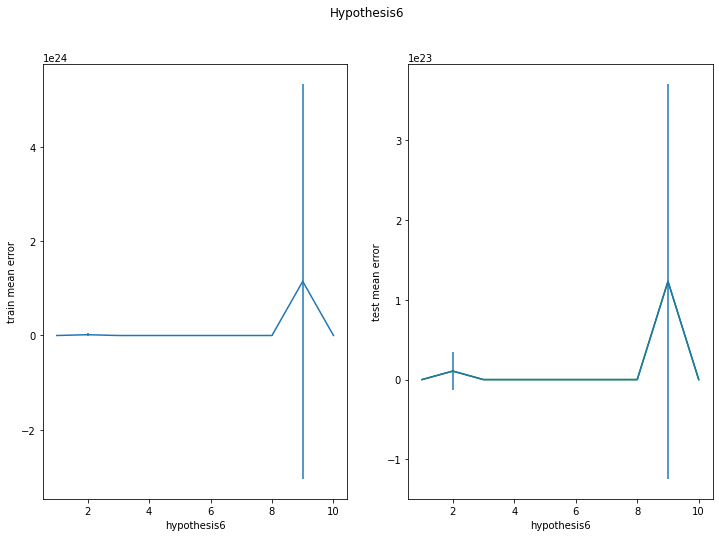

min training error  0.08468072225386893  at index 4 for Hypothesis  6


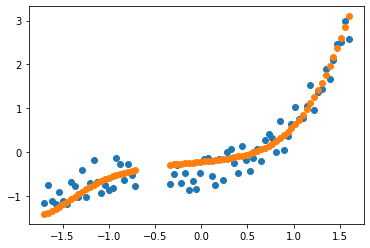

In [125]:
computeModels(degree=7)
computeErrors(degree=7,nthModel=5)

weights :  [0.29495912 0.07765035 0.21104638 0.12823102 0.04015954 0.00218422]
w0 :  [-0.28845107]
weights :  [ -372.36255028   852.83391532    26.00736246  -171.8672146
  2679.6215803  -5637.68710577]
w0 :  [1239.45302651]
weights :  [0.26318666 0.0852374  0.20536828 0.0974531  0.06643426 0.01443828]
w0 :  [-0.25356628]
weights :  [0.26859155 0.08330978 0.2287761  0.0951268  0.07696019 0.02550788]
w0 :  [-0.26232715]
weights :  [0.25987935 0.02875511 0.22778884 0.08119001 0.06642941 0.04114191]
w0 :  [-0.23558429]
weights :  [0.27712943 0.05340441 0.21260299 0.09335513 0.06262344 0.02812956]
w0 :  [-0.27002467]
weights :  [0.25482233 0.061186   0.21383808 0.10151311 0.04851653 0.00673044]
w0 :  [-0.28977967]
weights :  [0.17177265 0.01518599 0.17027482 0.07426852 0.0511298  0.01931532]
w0 :  [-0.23621482]
weights :  [-3.13792595e+09 -6.96774432e+09 -6.43360590e+09 -1.12781446e+10
 -5.39689828e+09 -9.75122382e+08]
w0 :  [-2.58051498e+09]
weights :  [ 0.20023234  0.0195624   0.19398539 

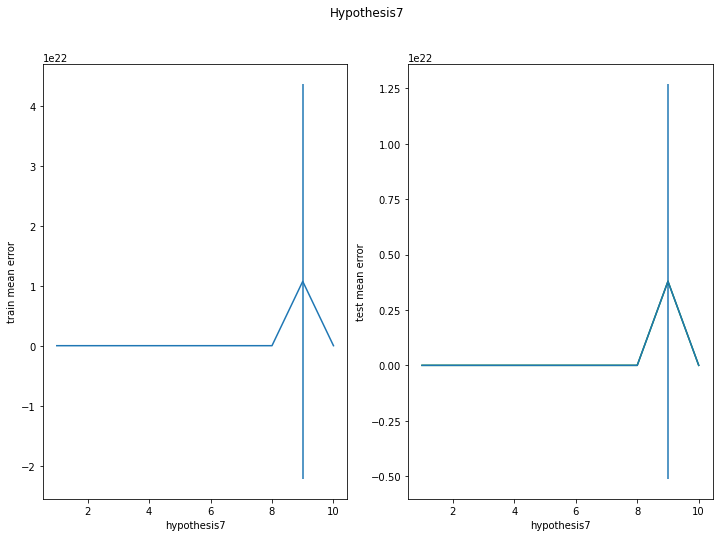

min training error  0.06743263909373992  at index 7 for Hypothesis  7


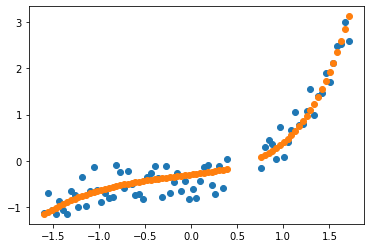

In [126]:
computeModels(degree=6)
computeErrors(degree=6,nthModel=6)

weights :  [ 1.86004401e+10 -1.60963727e+10  3.58144204e+10 -1.81937760e+10
  5.93940568e+10  8.33510556e+08  8.34651471e+10  9.11645892e+10]
w0 :  [-7.86242567e+09]
weights :  [-1.08199052e+10 -3.89225880e+09 -2.26027628e+10 -1.98967328e+09
  4.88898495e+09 -2.35348715e+10  2.29307285e+11 -2.38662700e+11]
w0 :  [-9.44629467e+08]
weights :  [ 9.33013066e+09 -4.35599870e+10  1.39114794e+10 -7.30743684e+10
  1.45657018e+10 -7.73713916e+10 -2.55876500e+10  8.18325140e+10]
w0 :  [-1.48878458e+10]
weights :  [ 1.83183003e+10  7.92610009e+09  2.91928943e+10  6.05398144e+09
  3.25573986e+10  1.27819763e+09 -5.08149826e+09 -5.22877311e+09]
w0 :  [9.07462669e+09]
weights :  [ 5.40290831e+08  2.71006446e+09 -6.29162503e+08 -1.51324508e+09
 -6.89382601e+09 -1.93889898e+10 -2.85257627e+10 -7.95534658e+10]
w0 :  [2.89052828e+09]
weights :  [-8.99900996e+09  1.13968247e+10 -9.27022270e+09  1.68901744e+10
 -2.26045600e+09  2.05924579e+10  2.92033462e+10  1.05672992e+10]
w0 :  [6.86277104e+09]
weights

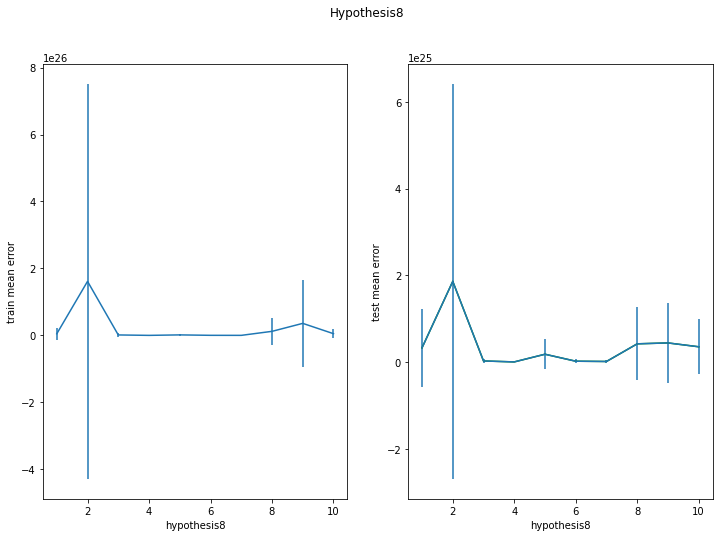

min training error  3.30364253092191e+22  at index 4 for Hypothesis  8


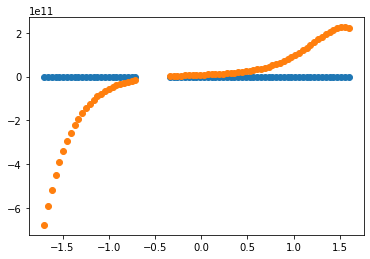

In [127]:
computeModels(degree=8)
computeErrors(degree=8,nthModel=7)

weights :  [ 2.04215008e+10 -3.30948502e+09  4.03197187e+10  1.58708049e+10
  6.17310613e+10  7.29001380e+10  6.06658581e+10  2.21051588e+11
 -6.68010152e+10]
w0 :  [-4.24385103e+09]
weights :  [ 1.25230560e+10  2.96157136e+10 -7.72809412e+09  7.47716922e+10
 -5.14595707e+10  8.94276653e+10 -9.37980488e+10 -1.70542380e+11
  1.14493998e+11]
w0 :  [-1.79360456e+09]
weights :  [ 3.63807101e+10 -1.04036137e+10  7.67767284e+10 -1.66252941e+10
  1.34041437e+11 -7.69947552e+09  1.77857976e+11  1.08654469e+11
  1.99967076e+10]
w0 :  [-7.01150593e+09]
weights :  [ 1.12644399e+09  6.54644098e+09 -1.42533278e+08  1.60887104e+10
 -5.71685922e+09  4.10091777e+10 -2.15380255e+10  9.99930025e+10
 -5.89782468e+10]
w0 :  [4.09484465e+09]
weights :  [-1.05396795e+10 -1.61017635e+10 -9.47975636e+09 -2.54103589e+10
 -5.71301665e+09 -2.43248583e+10  1.49391482e+09  2.20095205e+10
  4.26459110e+09]
w0 :  [-3.44812934e+09]
weights :  [ 9.38345447e+09  2.12051220e+10  1.18518866e+10  2.38188651e+10
  1.254365

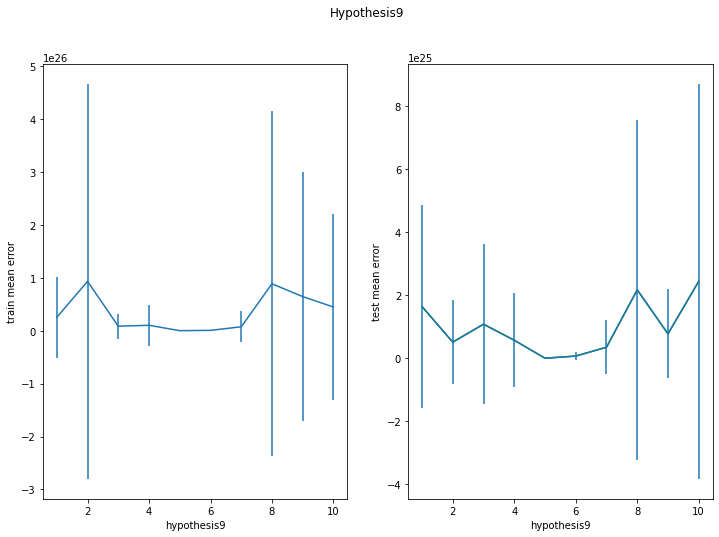

min training error  1.0882839915475858e+22  at index 5 for Hypothesis  9


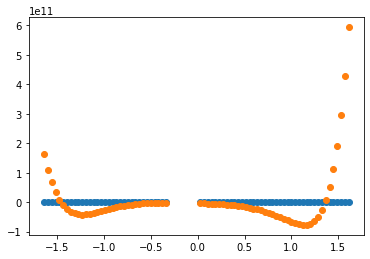

In [128]:
computeModels(degree=9)
computeErrors(degree=9,nthModel=8)